# Keras Simple MNIST Demo

In [3]:
# needed for matplotlib in jupyter notebook
%matplotlib inline

# import required modules
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

In [4]:
# load MNIST data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train shape:  (60000, 28, 28)


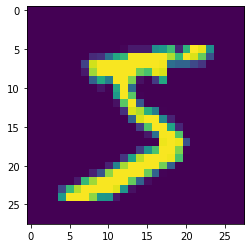

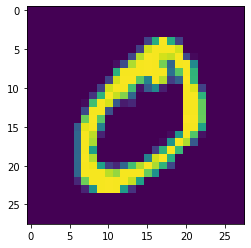

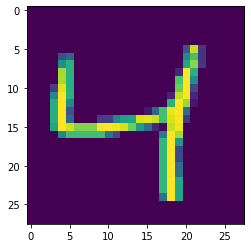

y_train shape:  (60000,)
[5 0 4]


In [5]:
# show training data
print ('x_train shape: ', x_train.shape)
for i in range(0,3):
    plt.imshow(x_train[i])
    plt.show()
    
# show training labels
print ('y_train shape: ', y_train.shape)
print (y_train[:3])

## Data preparation

In [6]:
# create a smaller test set
x_train = x_train[:2000]
y_train = y_train[:2000]
x_test = x_test[2000:2200]
y_test = y_test[2000:2200]

# change shape for input in keras cnn layer (channels should be last dimension)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape: ", x_train.shape)

# convert to float and scale 0-1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# convert classes to one-hot encoding
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("one-hot labels:\n", y_train[:3])


x_train shape:  (2000, 28, 28, 1)
one-hot labels:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Training

In [7]:
# create model
model = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
    Conv2D(128, 3, activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       36992     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [8]:
# fit model to training data
model.fit(x_train, y_train, validation_split=0.2, epochs=5)

Epoch 1/5
50/50 [==============================] - 2s 47ms/step - loss: 1.1432 - accuracy: 0.6300 - val_loss: 0.2989 - val_accuracy: 0.9275
Epoch 2/5
50/50 [==============================] - 2s 41ms/step - loss: 0.3795 - accuracy: 0.8863 - val_loss: 0.1850 - val_accuracy: 0.9600
Epoch 3/5
50/50 [==============================] - 2s 41ms/step - loss: 0.2558 - accuracy: 0.9250 - val_loss: 0.1751 - val_accuracy: 0.9500
Epoch 4/5
50/50 [==============================] - 2s 42ms/step - loss: 0.1907 - accuracy: 0.9431 - val_loss: 0.1533 - val_accuracy: 0.9525
Epoch 5/5
50/50 [==============================] - 2s 43ms/step - loss: 0.1579 - accuracy: 0.9500 - val_loss: 0.1494 - val_accuracy: 0.9550


## Evaluation

In [9]:
# evaluate model
score = model.evaluate(x_test, y_test)
print('Test accuracy:', score)

7/7 [==============================] - 0s 8ms/step - loss: 0.4921 - accuracy: 0.8900
Test accuracy: [0.49205300211906433, 0.8899999856948853]
